# Gem Price Prediction EDA

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [2]:
df=pd.read_csv('cubic_zirconia.csv')


(26967, 11)

In [3]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [4]:
df.shape

(26967, 11)

In [5]:
df=df.iloc[:, 1:]

In [6]:
#show the information about dataset
df_dtype=df.dtypes
df_missing=df.isna().mean().round(4)*100
df_desc = df.describe(include='all')
dtls_1=pd.DataFrame(df_missing, columns=['missing'])
dtls_2=pd.DataFrame(df_dtype, columns=['dtype'])
dtls_3=pd.DataFrame(df_desc)
dtls_3=dtls_3.T
dtls=pd.concat([dtls_1, dtls_2, dtls_3], axis=1)
dtls.sort_values(by='missing', ascending=False)

,missing,dtype,count,unique,top,freq,mean,std,min,25%,50%,75%,max
depth,2.58,float64,26270.0,NaN,NaN,NaN,61.745147,1.41286,50.8,61.0,61.8,62.5,73.6
carat,0.00,float64,26967.0,NaN,NaN,NaN,0.798375,0.477745,0.2,0.4,0.7,1.05,4.5
cut,0.00,object,26967,5,Ideal,10816,NaN,NaN,NaN,NaN,NaN,NaN,NaN
color,0.00,object,26967,7,G,5661,NaN,NaN,NaN,NaN,NaN,NaN,NaN
clarity,0.00,object,26967,8,SI1,6571,NaN,NaN,NaN,NaN,NaN,NaN,NaN
table,0.00,float64,26967.0,NaN,NaN,NaN,57.45608,2.232068,49.0,56.0,57.0,59.0,79.0
x,0.00,float64,26967.0,NaN,NaN,NaN,5.729854,1.128516,0.0,4.71,5.69,6.55,10.23
y,0.00,float64,26967.0,NaN,NaN,NaN,5.733569,1.166058,0.0,4.71,5.71,6.54,58.9
z,0.00,float64,26967.0,NaN,NaN,NaN,3.538057,0.720624,0.0,2.9,3.52,4.04,31.8
price,0.00,int64,26967.0,NaN,NaN,NaN,3939.518115,4024.864666,326.0,945.0,2375.0,5360.0,18818.0


## Missing value Treatment

In [7]:
df['depth'].fillna(df['depth'].mean(), inplace=True)

## Let's drop duplicates

In [8]:
print(f'before removing duplicates{df.shape}')
df.drop_duplicates(inplace=True)
print(f'after removing duplicates{df.shape}')

before removing duplicates(26967, 10)
after removing duplicates(26933, 10)


## Univariate Analysis

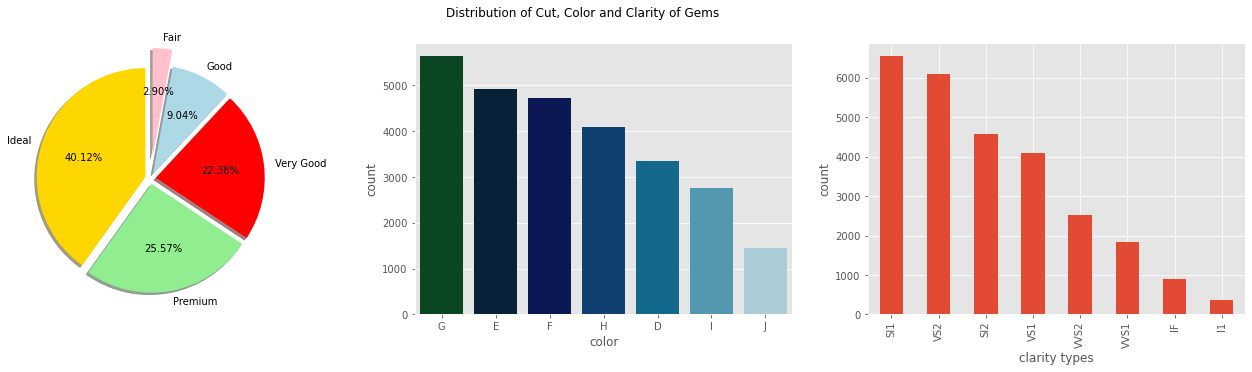

In [9]:
plt.rcParams['figure.figsize']=23,5
plt.subplot(131)
plt.pie(df['cut'].value_counts().values,
        labels=df['cut'].value_counts().index,
        startangle=90,
        colors=['gold', 'lightgreen', 'red', 'lightblue', 'pink'],
        explode=[0.05,0.05,0.05,0.05,0.2],
        shadow=True, autopct='%1.2f%%')
plt.subplot(132)
sns.countplot(df['color'], palette='ocean', order=df['color'].value_counts().index)

plt.subplot(133)
df["clarity"].value_counts().plot.bar()
plt.xlabel('clarity types')
plt.ylabel('count')


plt.suptitle('Distribution of Cut, Color and Clarity of Gems')
plt.show()

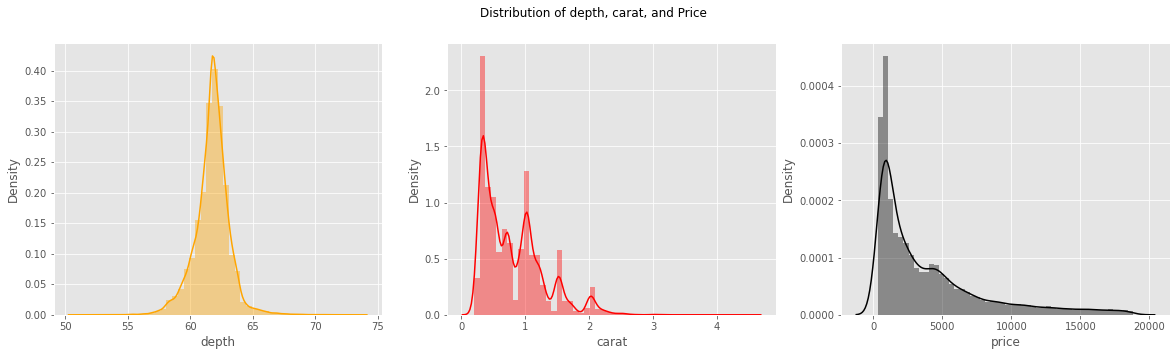

In [10]:
plt.rcParams['figure.figsize']=20,5
plt.subplot(131)
sns.distplot(df['depth'], color='orange')

plt.subplot(132)
sns.distplot(df['carat'], color='red')

plt.subplot(133)
sns.distplot(df['price'], color='black')

plt.suptitle('Distribution of depth, carat, and Price')
plt.show()

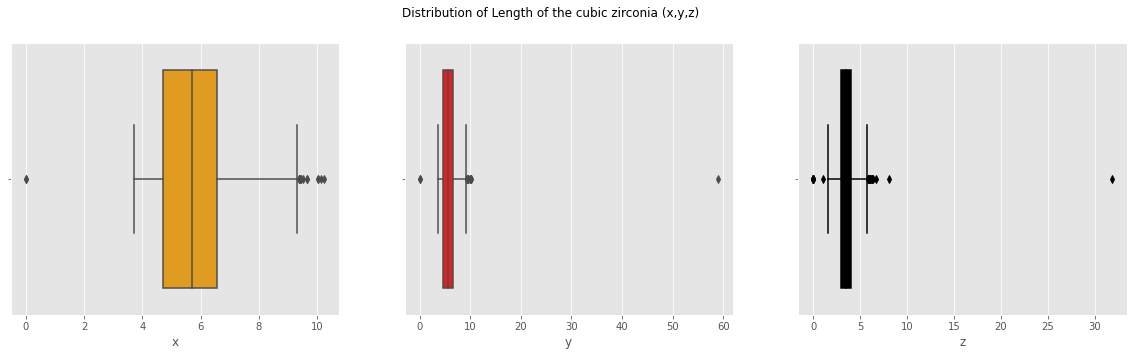

In [11]:
plt.rcParams['figure.figsize']=20,5
plt.subplot(131)
sns.boxplot(df['x'], color='orange')

plt.subplot(132)
sns.boxplot(df['y'], color='red')

plt.subplot(133)
sns.boxplot(df['z'], color='black')

plt.suptitle('Distribution of Length of the cubic zirconia (x,y,z)')
plt.show()

In [12]:
import plotly.express as px

## Bivariate Analysis

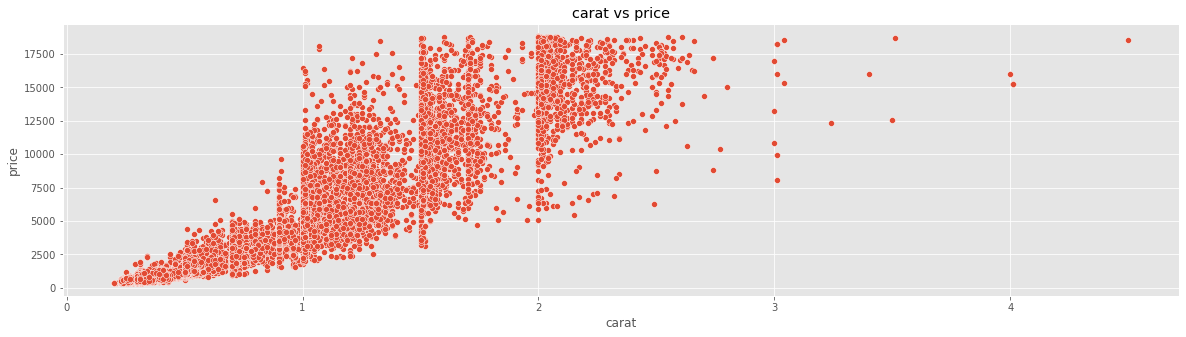

In [13]:
sns.scatterplot(df['carat'], df['price'])
plt.title('carat vs price')
plt.show()

### Observation :- 
* If carat increased price is also increases

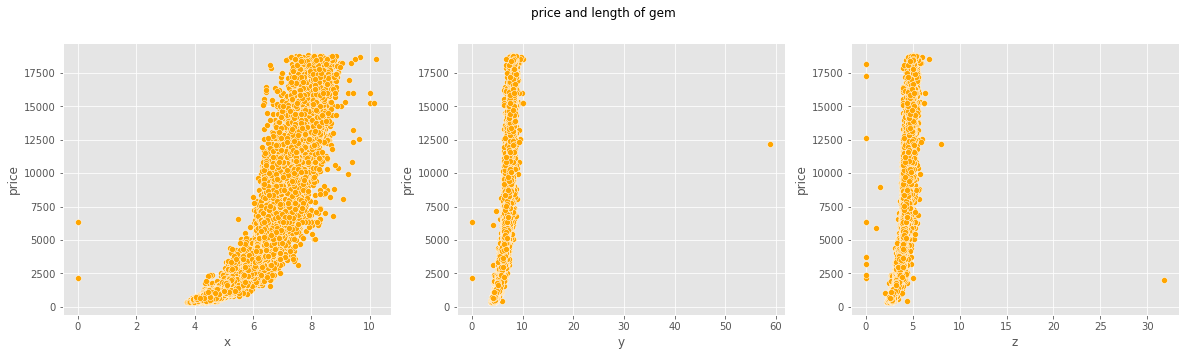

In [14]:
plt.rcParams['figure.figsize']=20,5
plt.subplot(131)
sns.scatterplot(df['x'], df['price'], color='orange')

plt.subplot(132)
sns.scatterplot(df['y'], df['price'], color='orange')

plt.subplot(133)
sns.scatterplot(df['z'], df['price'], color='orange')

plt.suptitle('price and length of gem')
plt.show()

In [15]:
#we have few zeros in gem size and length, either we can drop or replace with proper value.
#I'll drop coz dropping 9 from 27000 will not gonna affect much
df=df[~((df['x']==0)|(df['y']==0)|(df['z']==0))]

In [16]:
#We have outliers in y and z let's cap them with most frequent value

df['y'].values[df['y'].values>50]=df['y'].mode()[0]
df['z'].values[df['z'].values>30]=df['z'].mode()[0]

<AxesSubplot:xlabel='clarity', ylabel='price'>

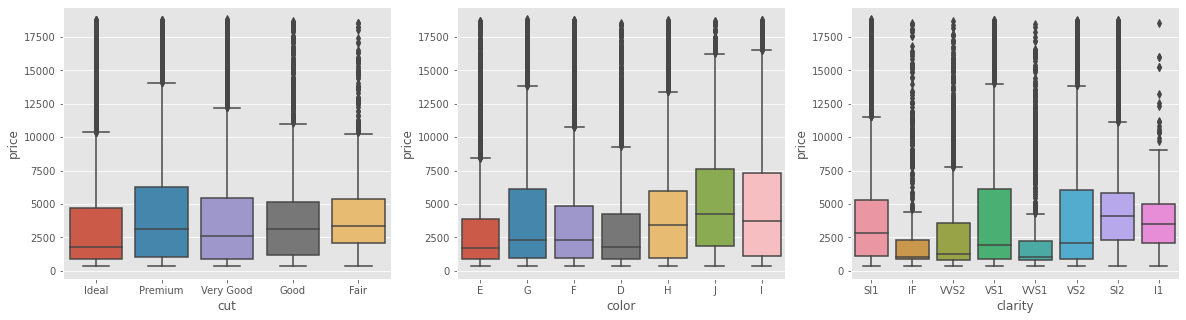

In [17]:
plt.subplot(131)
sns.boxplot(df['cut'], df['price'])

plt.subplot(132)
sns.boxplot(df['color'], df['price'])

plt.subplot(133)
sns.boxplot(df['clarity'], df['price'])

In [18]:
df[['price', 'cut']].groupby(['cut']).agg(['min', 'mean', 'max']).style.background_gradient(cmap='Wistia')

In [19]:
df[['price', 'color']].groupby(['color']).agg(['min', 'mean', 'max']).style.background_gradient(cmap='Wistia')

In [20]:
df[['price', 'clarity']].groupby(['clarity']).agg(['min', 'mean', 'max']).style.background_gradient(cmap='Wistia')